# New York Airbnb Data Exploration and Modeling 

1.Identification of Relevant Datasets
2.Cleansing and data transformation
3.Visualization
    3.1 Top 15 Most Popular Words
    3.2 Visualization for Share of different neighbourhood group
    3.3 Visualization for Representing different neighbourhood groups wrt Longitude vs Latitude
    3.4 Visualization for Top 10 Most Popular Airbnb Hosts
    3.5 Visualization for Number of Airbnb at Each Location
    3.6 Visualization for Number of Reviews at Each Location
    3.7 Visualization for Location Wise Room Type Occupancy
    3.8 Visualization for Pairwise Correlation of Selected Variables in Dataset
4.Modeling

# Identification of Relevant Datasets

In [57]:
#!pip install nltk
#!pip install -U scikit-learn scipy matplotlib
#!pip install stop-words
#!pip install plotly==4.1.0

import plotly as plotly
import plotly.express as px
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import nltk
import os
from nltk.stem import LancasterStemmer
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import nltk.corpus


csv = pd.read_csv("AB_NYC_2019.csv")
csv

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Data Cleansing

In [58]:
# In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to
# our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, 
# "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this
# column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" is 
#basically related to number of reviews and to analyze we don't need this data separately as we can take data from number_of_reviews.
# Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [59]:
csv.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [60]:
dfairbnb = csv.dropna(subset=['name'])
dfairbnb=csv.fillna(0)

dfairbnb.drop(["id","host_name","last_review","reviews_per_month"], axis = 1, inplace = True)
dfairbnb.drop( dfairbnb[ dfairbnb['price'] == 0 ].index , inplace=True)
dfairbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


# Data Observation

In [61]:
# Checking unique values in the columns of the dataframe
print('\nRows : ',dfairbnb.shape[0])
print('\nColumns :', dfairbnb.shape[1])
print('\nColumns:',dfairbnb.columns.to_list())
print(' \nUnique:\n',dfairbnb.nunique())


Rows :  48884

Columns : 12

Columns: ['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
 
Unique:
 name                              47895
host_id                           37455
neighbourhood_group                   5
neighbourhood                       221
latitude                          19046
longitude                         14715
room_type                             3
price                               673
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64


# Data Visualization

### Top 15 Most Popular Words

In [62]:
#Read the CSV file
Bnb =dfairbnb.head(5000)
Bnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Cozy room in NYC,5164854,Manhattan,Harlem,40.82071,-73.93813,Private room,45,6,13,8,346
4996,Bedroom in Williamsburg w/ Terrace,18105672,Brooklyn,Williamsburg,40.71659,-73.94580,Private room,90,30,1,1,0
4997,Bedr w Priv Bathr+Balc 15m frm city,6150064,Queens,Astoria,40.76972,-73.92060,Private room,85,2,2,1,0
4998,Charming bedroom in Comfy apt,18115202,Manhattan,East Village,40.72960,-73.99054,Private room,85,1,0,1,0


In [63]:
#Transfer to Dataframe
dt=pd.DataFrame(Bnb['name'])
dt = pd.DataFrame(' '.join(dt['name'].astype(str).tolist()), columns=['name'], index=[0])
dt= dt.apply(lambda x: x.astype(str).str.lower())
txt = dt['name'].astype(str)

In [64]:
# importing word_tokenize from nltk and stop_words from get_stop_words
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words

# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(txt[0])

#Gets all the Stop words in English Language and remove it from the token
stop_words = get_stop_words('english')
token = [x for x in token if x not in stop_words]

#Remove all the special characters and numbers from the token
token = [x for x in token if x.isalpha()==True]
token

['clean',
 'quiet',
 'apt',
 'home',
 'park',
 'skylit',
 'midtown',
 'castle',
 'village',
 'harlem',
 'york',
 'cozy',
 'entire',
 'floor',
 'brownstone',
 'entire',
 'apt',
 'spacious',
 'central',
 'park',
 'large',
 'cozy',
 'br',
 'apartment',
 'midtown',
 'east',
 'blissartsspace',
 'large',
 'furnished',
 'room',
 'near',
 'cozy',
 'clean',
 'guest',
 'room',
 'family',
 'apt',
 'cute',
 'cozy',
 'lower',
 'east',
 'side',
 'bdrm',
 'beautiful',
 'upper',
 'west',
 'side',
 'central',
 'broadway',
 'lovely',
 'room',
 'garden',
 'best',
 'area',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'manhattan',
 'singles',
 'west',
 'village',
 'nest',
 'superhost',
 'stops',
 'manhattan',
 'studio',
 'perfect',
 'parents',
 'garden',
 'chelsea',
 'perfect',
 'hip',
 'historic',
 'brownstone',
 'apartment',
 'backyard',
 'huge',
 'br',
 'upper',
 'east',
 'cental',
 'park',
 'sweet',
 'spacious',
 'brooklyn',
 'loft',
 'cbg',
 'ctybgd',
 'helpshaiti',
 'rm',
 'cbg',
 'helps

In [65]:
from nltk.probability import FreqDist
#Finding the Frequency Distribution of a word
fdist = FreqDist(token)
fdist
#Gets the top occuring tokens
fdist1 = fdist.most_common(20)
final_data=pd.DataFrame(fdist1,columns=['Word','Frequency'])
final_data

,Word,Frequency
0,room,788
1,apt,656
2,private,589
3,bedroom,588
4,apartment,503
5,brooklyn,408
6,studio,387
7,sunny,372
8,loft,370
9,park,360


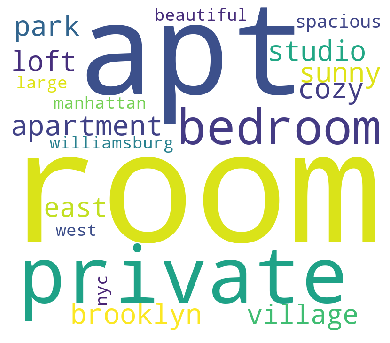

In [66]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
comment_words = ' '
for words in final_data['Word']: 
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 700, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 10)  
plt.show()

In [67]:
# These are the most popular words used for host name,but they have no impact on the price. Since these are the most 
#frequently used words in posting an ad, One can use these words by anyone who is listing an airbnb.

### Representing Share Of Different neighbourhood groups

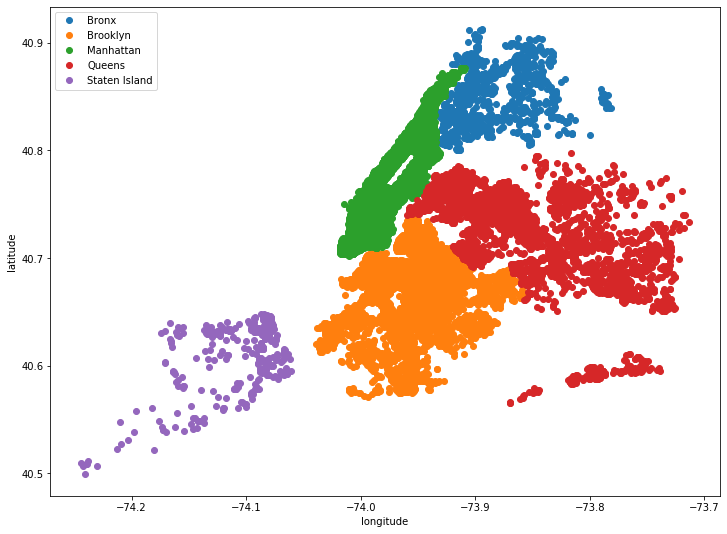

In [68]:
# Longitude vs Latitude (Representing different neighbourhood groups)
import numpy as np
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size
fig,ax = plt.subplots()
groups = dfairbnb.groupby('neighbourhood_group')
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', label=name)
ax.legend(loc=2)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

In [69]:
#The scatter plot given above has been plotted using latitude and longitude. The scatter plot helps to visualize the cluster of locations. 
#It helps to understand which area is more densely populate with AirBnb's.

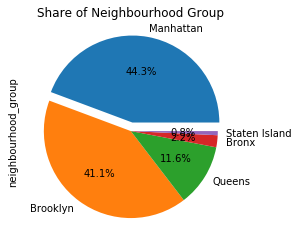

In [70]:
#representaion using Pie-Chart
%matplotlib inline
import matplotlib.pyplot as plt

values = dfairbnb['neighbourhood_group'].value_counts()
colors = ['b', 'g', 'r', 'c', 'm']
explode = (0.1, 0.0, 0.0, 0.0, 0)
dfairbnb['neighbourhood_group'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Share of Neighbourhood Group')

plt.show()

### Top 10 Most Popular Airbnb Hosts

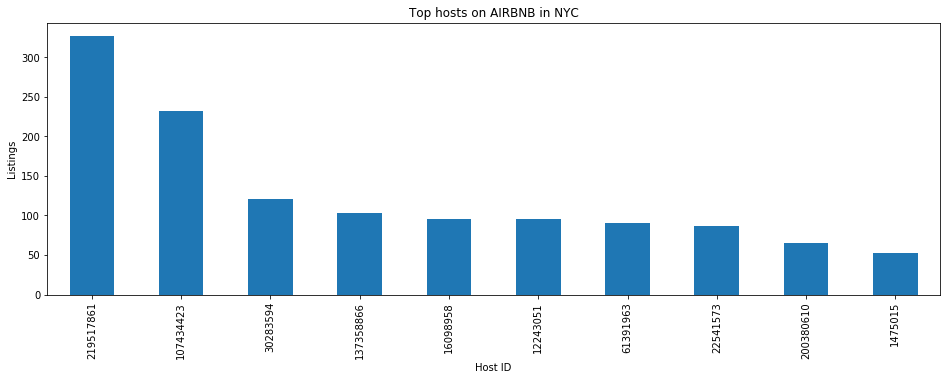

In [71]:
dfairbnb1=dfairbnb.host_id.value_counts()[:10]
f,ax = plt.subplots(figsize=(16,5))

ax=dfairbnb1.plot(kind='bar')
ax.set_xlabel('Host ID')
ax.set_ylabel('Listings')
ax.set_title("Top hosts on AIRBNB in NYC")
plt.show()


### Bar Graph to Show Number of Reviews at Each Location

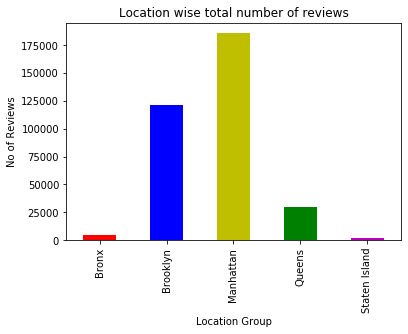

In [72]:
dfNoOfReviews=dfairbnb.groupby(['neighbourhood_group']).sum()

ax = dfNoOfReviews.plot(y = 4, kind = "bar", color=['r','b','y','g','m'], legend=False)
ax.set_ylabel('No of Reviews')
ax.set_xlabel('Location Group')

plt.title('Location wise total number of reviews')

plt.show()

### Bar Graph to Show Location Wise Room Type Occupancy

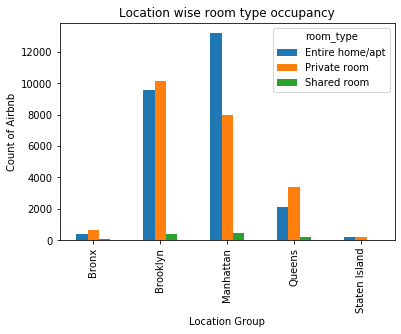

In [73]:
dfLocRoom = dfairbnb.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()

dfdraw = dfLocRoom.plot(kind = "bar")
dfdraw.set_ylabel('Count of Airbnb')
dfdraw.set_xlabel('Location Group')

plt.title('Location wise room type occupancy')

plt.show()

# Average price of a room according to the neighbourhood

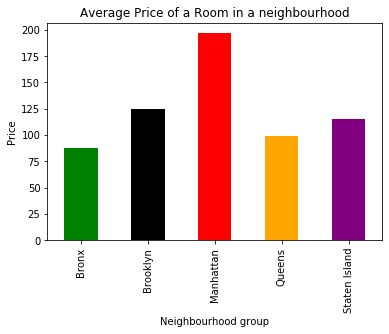

In [74]:
%matplotlib inline  

# this actually imports matplotlib
import matplotlib.pyplot as plt  
price_neighbourhood = dfairbnb.groupby(['neighbourhood_group'])['price'].agg('mean')
ax = price_neighbourhood.plot(kind = "bar", color=['green','black','red','orange','purple'])
ax.set_ylabel('Price')
ax.set_xlabel('Neighbourhood group')

plt.title('Average Price of a Room in a neighbourhood')

plt.show()

# Box plot to see price range for different types of rooms

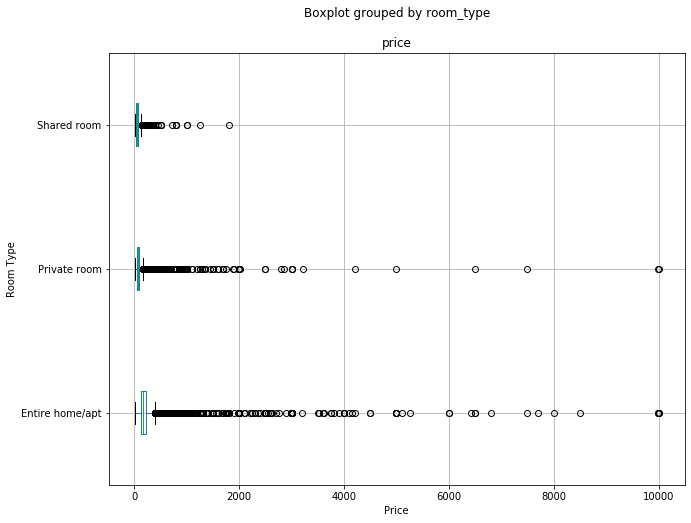

In [75]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d3=dfairbnb.copy()
ax=d3.boxplot(column='price', by='room_type', figsize=(10, 8),vert=False)
ax.set_ylabel('Room Type')
ax.set_xlabel('Price')

plt.show()

In [76]:
dfGraph = dfairbnb.groupby(['neighbourhood_group','room_type']).mean()

room_types_neighbourhoods = dfGraph.drop(['latitude','longitude','number_of_reviews'], axis = 1)
room_types_neighbourhoods
colorA = ['red','green','blue']
fig = px.scatter_matrix(room_types_neighbourhoods,height=1000,width=900)
fig.update_traces(diagonal_visible=False)
fig.show()

In [77]:
#There is no strong corelation amonge the defferent variables.

# Preprocessing and Preparing Data for Modeling 

In [32]:
dfairbnb.drop(["host_id"], axis = 1, inplace = True)
dfairbnb.drop( dfairbnb[ dfairbnb['price'] == 0 ].index , inplace=True)
dfairbnb.sort_values(by=['price'],ascending=True).head(1000)
dt = dfairbnb
dt.sort_values(by=['price'],ascending=True).head(400)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
24100,"Girls only, cozy room one block from Times Square",Manhattan,Hell's Kitchen,40.75812,-73.98935,Shared room,10,1,2,1,0
32810,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10,1,14,1,4
33225,Voted #1 Airbnb In NYC,Queens,Jamaica,40.68939,-73.79886,Entire home/apt,10,2,22,1,332
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,40.76844,-73.98333,Private room,10,1,2,1,0
35601,"Charming, bright and brand new Bed-Stuy home",Brooklyn,Bedford-Stuyvesant,40.69508,-73.95164,Entire home/apt,10,3,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
46092,005 Comfy and Pleasant Shared Room,Staten Island,Concord,40.60625,-74.08900,Shared room,30,4,1,7,68
34069,Brooklyn Magic Bunk Share,Brooklyn,Bedford-Stuyvesant,40.69052,-73.94149,Shared room,30,1,32,17,83
16010,Sofa Bed Available in Midtown Manhattan,Manhattan,Hell's Kitchen,40.76455,-73.99128,Shared room,30,3,0,1,0
35099,Creative Bushwick - Cozy Private Room,Brooklyn,Bushwick,40.68880,-73.92015,Private room,30,1,18,1,93


# Prediction modeling 

# Pairwise Correlation of Selected Variables in Dataset

In [43]:
dfairbnb.corr()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood_group,1.000000,0.111187,0.279598,0.101364,-0.016104,0.044123,0.017409,0.002392,0.073666,0.080506
neighbourhood,0.111187,1.000000,0.234743,-0.102253,-0.071685,0.061967,0.026023,-0.038753,0.010326,-0.034581
latitude,0.279598,0.234743,1.000000,0.084830,0.006599,0.033899,0.024893,-0.016009,0.019518,-0.010942
longitude,0.101364,-0.102253,0.084830,1.000000,0.184192,-0.149954,-0.062772,0.058017,-0.114715,0.082669
room_type,-0.016104,-0.071685,0.006599,0.184192,1.000000,-0.249288,-0.069909,0.001465,-0.106073,0.022381
price,0.044123,0.061967,0.033899,-0.149954,-0.249288,1.000000,0.042805,-0.048273,0.057462,0.081847
minimum_nights,0.017409,0.026023,0.024893,-0.062772,-0.069909,0.042805,1.000000,-0.081163,0.127962,0.144275
number_of_reviews,0.002392,-0.038753,-0.016009,0.058017,0.001465,-0.048273,-0.081163,1.000000,-0.073536,0.173683
calculated_host_listings_count,0.073666,0.010326,0.019518,-0.114715,-0.106073,0.057462,0.127962,-0.073536,1.000000,0.225712
availability_365,0.080506,-0.034581,-0.010942,0.082669,0.022381,0.081847,0.144275,0.173683,0.225712,1.000000


# Linear Regression Model

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression


X_R1=df1[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','calculated_host_listings_count','availability_365']]
y_R1=df1['price']

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 1)

In [241]:
lm = LinearRegression()

In [242]:
lm.fit(X_train,y_train)
predicts = lm.predict(X_test)

In [243]:
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2

r2 score is:


0.1076720333903688

In [244]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)

Mean absolute error is:


74.28437501692527

In [217]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predicts.flatten()})
error_diff1 = error_diff.head(20)

In [218]:
error_diff1.head(5)

,Actual Values,Predicted Values
0,184,246.579478
1,125,224.713426
2,170,204.022040
3,300,226.035686
4,82,128.659162


#  Gradient Boosted Regressor model

In [220]:
import xgboost
import warnings 
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error

In [238]:
xgb = xgboost.XGBRegressor(n_estimators=200,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))

r2 = r2_score(y_test,xgb_pred)
print('r2 score is:',r2)

print("Mean absolute error is:",mean_absolute_error(y_test,xgb_pred))
predict = xgb.predict(X_test)
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
error_diff1 = error_diff.head(20)
error_diff1.head()

r2 score is: 0.1662692786279122
Mean absolute error is: 67.2365780384819


,Actual Values,Predicted Values
0,184,167.265594
1,125,138.317429
2,170,202.480103
3,300,222.339752
4,82,179.667099
